# 形态转换
 Erosion, Dilation, Opening, Closing 

 通常作用与binary images。两输入，一个是原始图像，另一个是structuring element or kernel，决定操作性质。

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

## Erosion
侵蚀的基本思想就像土壤侵蚀一样，它侵蚀前景物体的边界(尽量使前景保持白色)。它是做什么的呢?内核滑动通过图像(在2D卷积中)。原始图像中的一个像素(无论是1还是0)只有当内核下的所有像素都是1时才被认为是1，否则它就会被侵蚀(变成0)。

结果是，根据内核的大小，边界附近的所有像素都会被丢弃。因此，前景物体的厚度或大小减小，或只是图像中的白色区域减小。它有助于去除小的白色噪声

在这里，作为一个例子，我将使用一个5x5内核，它包含了所有的1。让我们看看它是如何工作

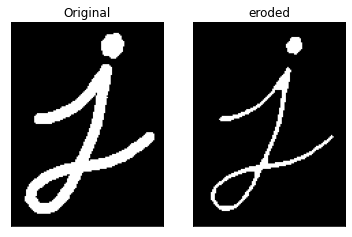

In [7]:
img = cv.imread('./images/j.png', 0)
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(img, kernel, iterations=1)

plt.subplot(121), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(erosion, cmap='gray'), plt.title('eroded')
plt.xticks([]), plt.yticks([])
plt.show()

## Dilation
它与侵蚀正好相反。如果内核下的至少一个像素为“ 1”，则像素元素为“ 1”。因此，它会增加图像中的白色区域或增加前景对象的大小。通常，在消除噪音的情况下，腐蚀后会膨胀。因为腐蚀会消除白噪声，但也会缩小物体。因此，我们对其进行了扩展。由于噪音消失了，它们不会回来，但是我们的目标区域增加了。在连接对象的损坏部分时也很有用

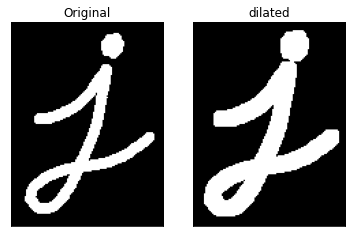

In [8]:
dilation = cv.dilate(img, kernel, iterations=1)

plt.subplot(121), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dilation, cmap='gray'), plt.title('dilated')
plt.xticks([]), plt.yticks([])
plt.show()

## Opening
erosion followed by dilation

消除噪声

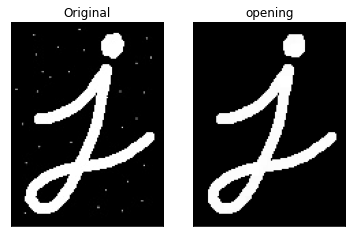

In [9]:
img1 = cv.imread('./images/backnoisy.jpg', 0)

opening = cv.morphologyEx(img1, cv.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(img1,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(opening, cmap='gray'), plt.title('opening')
plt.xticks([]), plt.yticks([])
plt.show()

## Closing
Dilation followed by Erosion

在关闭前景对象内部的小孔或对象上的小黑点时很有用

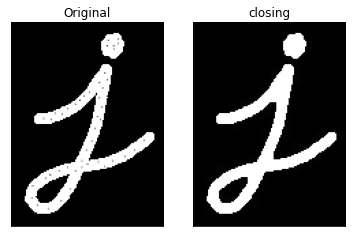

In [10]:
img2 = cv.imread('./images/blackpoints.jpg', 0)

closing = cv.morphologyEx(img2, cv.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(img2,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing, cmap='gray'), plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()

## Morphological Gradient
图像扩张和侵蚀的差

看起来像轮廓

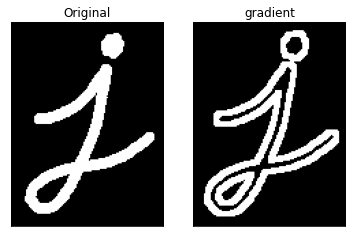

In [11]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.subplot(121), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gradient, cmap='gray'), plt.title('gradient')
plt.xticks([]), plt.yticks([])
plt.show()

## Top Hat
图像输入和opening的差

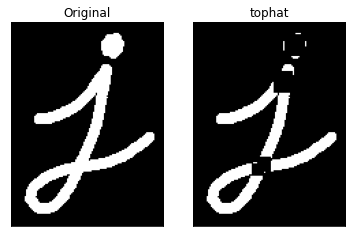

In [12]:
kernel1 = np.ones((9,9),np.uint8)

tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel1)

plt.subplot(121), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(tophat, cmap='gray'), plt.title('tophat')
plt.xticks([]), plt.yticks([])
plt.show()

## Black Hat
closing 和输入图像的差

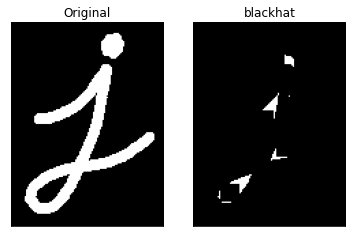

In [13]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel1)

plt.subplot(121), plt.imshow(img,cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blackhat, cmap='gray'), plt.title('blackhat')
plt.xticks([]), plt.yticks([])
plt.show()

## Structuring Element
有些时候要获得的不只是方形矩阵，
圆形、椭圆形状的kernel可以通过**cv.getStructuringElement()**获得，传入shape和size就行

In [14]:
cv.getStructuringElement(cv.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [15]:
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [16]:
cv.getStructuringElement(cv.MORPH_CROSS, (5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)